## KNN: K-vecinos mas cercanos

## Modelos parametricos frente a no parametricos

Los algoritmos de aprendizaje automatico pueden clasificarse en dos grupos, en modelos parametricos y modelos no parametricos. 

Los parametricos estiman una serie de parametros a partir de conjuntos de datos de entrenamiento para aprender una funcion que pueda clasificar nuevos puntos de datos sin necesidad del conjunto de datos de entrenamiento. Ejemplos de este tipo de aprndizaje son _el perceptron_ , _la regresion logistica_ , y las _SVM lineales_. 

Los no parametricos no se pueden caracterizar por un conjunto fijo de parametros, porque el numero de parametros crece con los datos de entrenamiento. Ejemplo de esto son los _arboles de decision_ , _bosques aleatorios_ y _SVM kernelizadas_.

El _KNN_ pertence a una subcategoria de los modelos no parametricos, llamada **aprendizaje basado en instancias** que se caracteriza por modelos que memorizan los datos de entrenamiento. Mas aun, _KNN_ pertence a un caso especial conocido como **aprendizaje vago**, el cual esta asociado con un costo nulo durante el proceso de aprendizaje. Visto de otra forma, el aprendizaje vago se caracteriza por la no obtencion de informacion discriminativa a partir de los datos de entrenamiento, sino mas bien por una memorizacion de los mismos.

Pasos del algoritmo:
1. Elegir un $k$y una medida de distancia.
2. Encontrar los $k$-vecinos mas cercanos de la muestra que se quiere clasificar.
3. Asignar la etiqueta de clase por mayoria de votos.

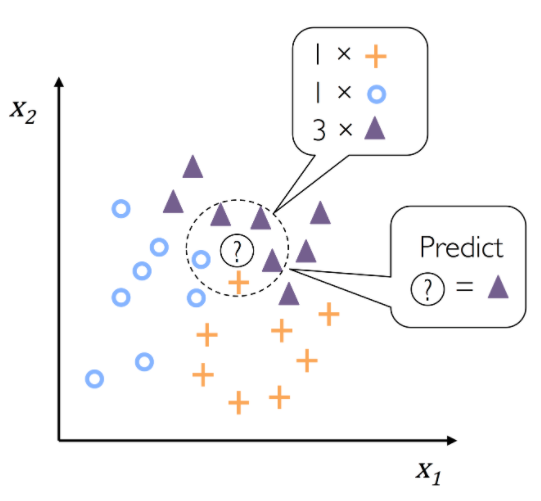

La ventaja de un enfoque basado en memoria como este es que el algoritmo se adapta inmediatamente conuando recogemos nuevos datos de entrenamiento, lo malo es que la complejidad computacional del algortimo aumenta linealmente a medida que agregamos nuevas muestras de entrenamiento.

Es importante recordar que **el escalamiento de variables es muy importante para que cada caracteristica aporte de manera significativa en el calculo de las distancias.**

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [8]:
from sklearn import datasets
import numpy as np
datos = datasets.load_iris()
X = datos.data[:, [2, 3]]
y = datos.target

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [11]:
%matplotlib notebook
fig, ax = plt.subplots()
plot_decision_regions(X_train_std, y_train, classifier=knn)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')


NameError: name 'plt' is not defined

In [12]:
from sklearn.metrics import accuracy_score
y_pred_train = knn.predict(X_train_std)
y_pred_test = knn.predict(X_test_std)
print(f'Precision en los datos de entrenamiento: {accuracy_score(y_train, y_pred_train)}')
print(f'Precision en los datos de prueba: {accuracy_score(y_test, y_pred_test)}')

Precision en los datos de entrenamiento: 0.9583333333333334
Precision en los datos de prueba: 0.9666666666666667


En caso de empate, la implementacion de sklearn del algoritmo KNN se decantara por los vecinos que esten mas cerca de la muestra. Si las distancias son similares, el algoritmo elegira la etiqueta de clase que aparezca de primeras en los datos de entrenamiento.

La eleccion de $k$ es muy importante para evitar el sobreajuste y el subajuste. Ademas debemos elegir una metrica apropiada para el conjunto de datos; para datos numericos, lo mas apropiado es utilizar la metrica de Minkowsky:

$$d(\textbf{x}^{(i)}, \textbf{x}^{(j)})=\sqrt[p]{\sum_k|{x_k^{(i)}-x_k^{(j)}}|^p}$$

con $p=2$, tendremos la clasica distancia euclidiana; con $p=1$, tendremos la distancia Manhattan, etc...

Mas informacion en https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

###### La maldicion de la dimensionalidad

KNN es muy suceptible al sobreajuste debido a que el espacio de caracteristicas se vuelve cada vez mas escaso para un numero cada vez mayor de dimensiones de un conjutno de datos de entrenamiento de tamaño fijo. En un espacio de mayores dimensiones incluso los vecinos ams cercanos estan demasiado lejos para ofrecer una buena estimacion.

<span class="burk">EJERCICIOS</span> 

1. Utilice el archivo Social_Network_Ads.csv para clasificar sus clases. Utilice las variables User Age, EstimatedSalary, Purchased. Grafique, mida la precision de los conjuntos de entrenamiento y test y saque sus conclusiones.

2. Utilice el archivo usuarios_win_mac_lin y clasifique. Mida la precision de los conjuntos de entrenamiento y test y saque sus conclusiones.

3. Utilice la siguiente instruccion para cargar valores para X y y:

         datasets.make_classification(1000, 20, n_informative=3)
    Realice la parte de preprocesado, clasifique los datos y mida su precision.

    Mas informacion sobre esta instruccion en: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

Utilice el archivo Social_Network_Ads.csv para clasificar sus clases. Utilice las variables User Age, EstimatedSalary, Purchased. Grafique, mida la precision de los conjuntos de entrenamiento y test y saque sus conclusiones.

In [13]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [14]:
import numpy as np
import pandas as pd
datos = pd.read_csv('Social_Network_Ads.csv')

X = datos.iloc[:, 2:4].values
y = datos.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

<IPython.core.display.Javascript object>


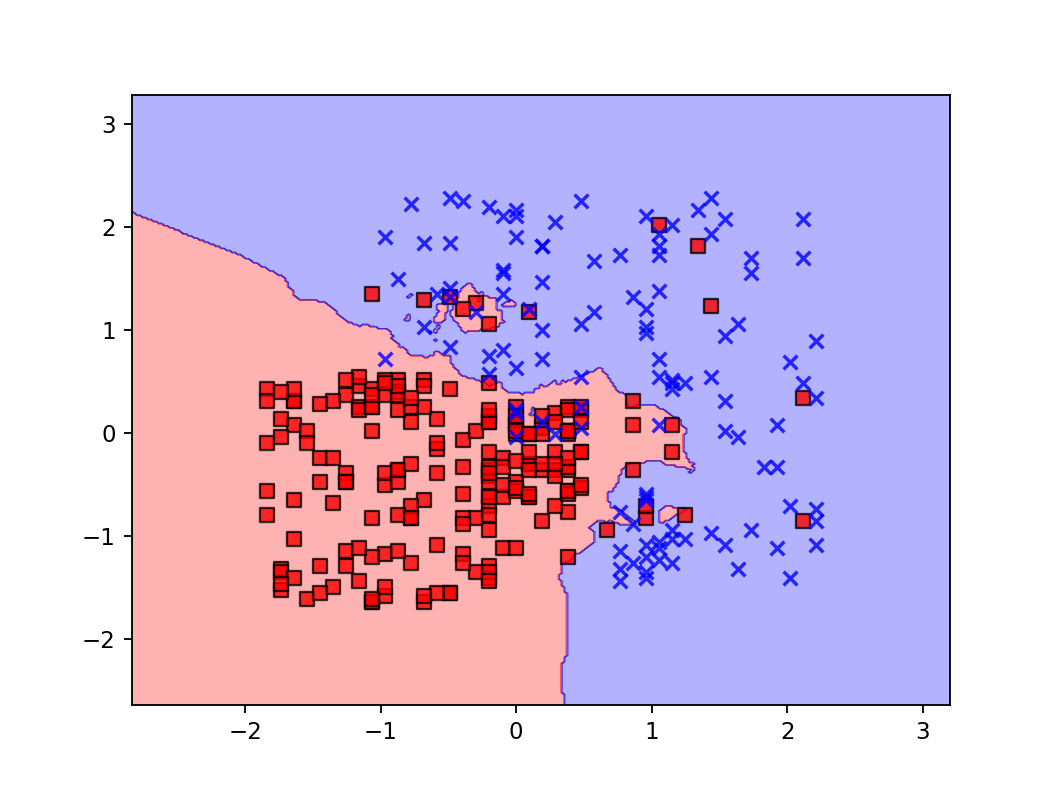

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()
plot_decision_regions(X_train_std, y_train, classifier=knn)


In [20]:
from sklearn.metrics import accuracy_score
y_pred_train = knn.predict(X_train_std)
y_pred_test = knn.predict(X_test_std)
print(f'Precision en los datos de entrenamiento: {accuracy_score(y_train, y_pred_train)}')
print(f'Precision en los datos de prueba: {accuracy_score(y_test, y_pred_test)}')

Precision en los datos de entrenamiento: 0.909375
Precision en los datos de prueba: 0.9375


Utilice el archivo usuarios_win_mac_lin y clasifique. Mida la precision de los conjuntos de entrenamiento y test y saque sus conclusiones.

In [21]:
import pandas as pd
df = pd.read_csv('usuarios_win_mac_lin.csv', dtype = str)
df.describe()
def reemplazo(row):
    row['duracion'] = row['duracion'].replace('.', '')
    return row
df.apply(reemplazo, axis = 1)
df = df.astype(int)

X = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [25]:
from sklearn.metrics import accuracy_score
y_pred_train = knn.predict(X_train_std)
y_pred_test = knn.predict(X_test_std)
print(f'Precision en los datos de entrenamiento: {accuracy_score(y_train, y_pred_train)}')
print(f'Precision en los datos de prueba: {accuracy_score(y_test, y_pred_test)}')

Precision en los datos de entrenamiento: 0.7867647058823529
Precision en los datos de prueba: 0.7941176470588235


Utilice la siguiente instruccion para cargar valores para X y y:

  datasets.make_classification(1000, 20, n_informative=3)
Realice la parte de preprocesado, clasifique los datos y mida su precision.

Mas informacion sobre esta instruccion en: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [26]:
(X,y)=datasets.make_classification(1000, 20, n_informative=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [29]:
from sklearn.metrics import accuracy_score
y_pred_train = knn.predict(X_train_std)
y_pred_test = knn.predict(X_test_std)
print(f'Precision en los datos de entrenamiento: {accuracy_score(y_train, y_pred_train)}')
print(f'Precision en los datos de prueba: {accuracy_score(y_test, y_pred_test)}')

Precision en los datos de entrenamiento: 0.93625
Precision en los datos de prueba: 0.86
